<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Course3/Week4/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import l1, l2
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-10-04 07:07:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-10-04 07:07:42 (94.2 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(total_words, activation="softmax"))
# Pick an optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 256)           822016    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 512)           1050624   
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 512)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              414219    
Total params: 2,976,139
Trainable params: 2,976,139
Non-trainable params: 0
____________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 8s 17ms/step - loss: 7.0561 - accuracy: 0.0228
Epoch 2/100
484/484 [==============================] - 8s 17ms/step - loss: 6.5230 - accuracy: 0.0222
Epoch 3/100
484/484 [==============================] - 8s 17ms/step - loss: 6.4244 - accuracy: 0.0240
Epoch 4/100
484/484 [==============================] - 8s 17ms/step - loss: 6.3294 - accuracy: 0.0277
Epoch 5/100
484/484 [==============================] - 8s 17ms/step - loss: 6.2337 - accuracy: 0.0298
Epoch 6/100
484/484 [==============================] - 8s 17ms/step - loss: 6.1618 - accuracy: 0.0322
Epoch 7/100
484/484 [==============================] - 8s 18ms/step - loss: 6.0965 - accuracy: 0.0389
Epoch 8/100
484/484 [==============================] - 8s 17ms/step - loss: 6.0405 - accuracy: 0.0392
Epoch 9/100
484/484 [==============================] - 8s 17ms/step - loss: 5.9797 - accuracy: 0.0438
Epoch 10/100
484/484 [==============================] - 8s 17ms/step - loss: 5.923

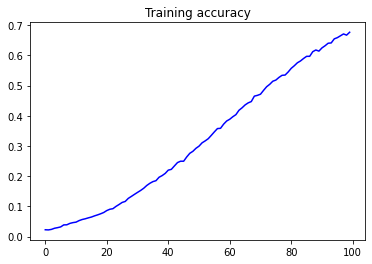

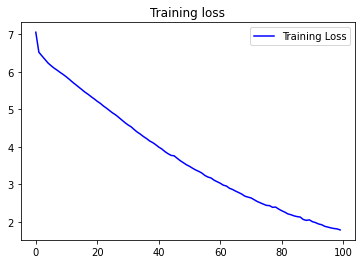

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope a man by curse in youth again on live good antique moan with youth with lease of most truth on woe ' cold muse though spent ten delight fled fitted pride quite gone to change i grow on young new set erred appetite in less pride still stay my deeds to view more gone to you not fire grow year from thee now told thou viewest ill last forbear with woe words up steal loving blood or errors weed broke with though crown'd with every hide not dwell in masonry day cold muse ' chide thee bear your wit out
